데이터 탐색 및 가상 결론 도출
다음은 데이터셋을 바탕으로 탐색적 데이터 분석(EDA)을 수행하며 연습할 문제들입니다. 이를 통해 데이터의 패턴과 관계를 파악하고, 가상 결론을 도출하는 연습을 할 수 있습니다.


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd 
data_df = pd.read_csv('../../datasets/happyscore_income.csv')
data_df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [ ]:
# 사전 insight 
# 소득 수준에 따라 행복 지수가 높게 나타날 것이다 

1. 기초 통계 탐색
1.1. 평균 행복 점수 (happyScore)
데이터셋에서 평균 happyScore를 계산하세요.

In [3]:
data_df['happyScore'].mean()

5.421909909909912

1.2. 소득 불평등 (income_inequality)
소득 불평등이 가장 높은 국가와 가장 낮은 국가를 찾으세요.

In [4]:
data_df['income_inequality'].max(), data_df['income_inequality'].min()

(63.72666666666667, 24.215)

2. 데이터 분포 분석
2.1. 지역별 평균 행복 점수
region에 따라 그룹화하고 각 그룹의 평균 happyScore를 구하세요.
어떤 지역이 가장 행복도가 높은지 확인하세요.

In [6]:
data_df.groupby('region')['happyScore'].mean()

region
'Australia and New Zealand'          7.284000
'Central and Eastern Europe'         5.347696
'Eastern Asia'                       5.333667
'Latin America and Caribbean'        6.224125
'Middle East and Northern Africa'    5.409600
'North America'                      7.273000
'Southeastern Asia'                  5.250286
'Southern Asia'                      4.647600
'Sub-Saharan Africa'                 4.196500
'Western Europe'                     6.762368
Name: happyScore, dtype: float64

In [9]:
data_df.groupby('region')['happyScore'].mean().idxmax(), data_df.groupby('region')['happyScore'].mean().max()

("'Australia and New Zealand'", 7.284)

2.2. 소득과 만족도 간의 관계
avg_income과 avg_satisfaction 간의 상관계수를 계산하세요.
두 변수 간의 관계에 대한 가설을 세우세요.

In [10]:
data_df[['avg_satisfaction','avg_income']].corr()

,avg_satisfaction,avg_income
avg_satisfaction,1.000000,0.689043
avg_income,0.689043,1.000000


In [ ]:
# 0.5 이상의 양의 상관관계를 보이므로, 평균 소득이 늘어나면, 평균 만족도가 늘어나게 된다.

3. 데이터 시각화
3.1. 행복 점수와 GDP 시각화
happyScore와 GDP의 관계를 산점도로 시각화하세요.
GDP가 높을수록 행복 점수가 높은 경향이 있는지 확인하세요.

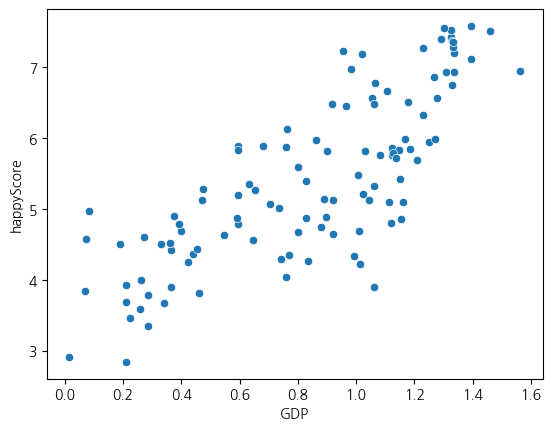

In [29]:
sns.scatterplot(data=data_df,y='happyScore',x='GDP')
plt.show()

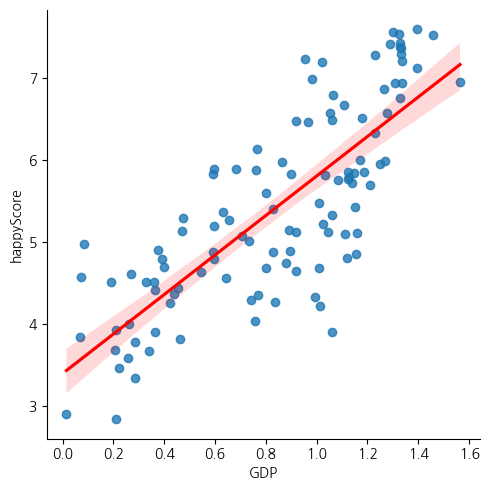

In [34]:
sns.lmplot(x='GDP', y='happyScore', data=data_df, line_kws={'color': 'red'})


3.2. 지역별 소득 불평등 분포
region별 income_inequality의 분포를 박스플롯으로 나타내세요.

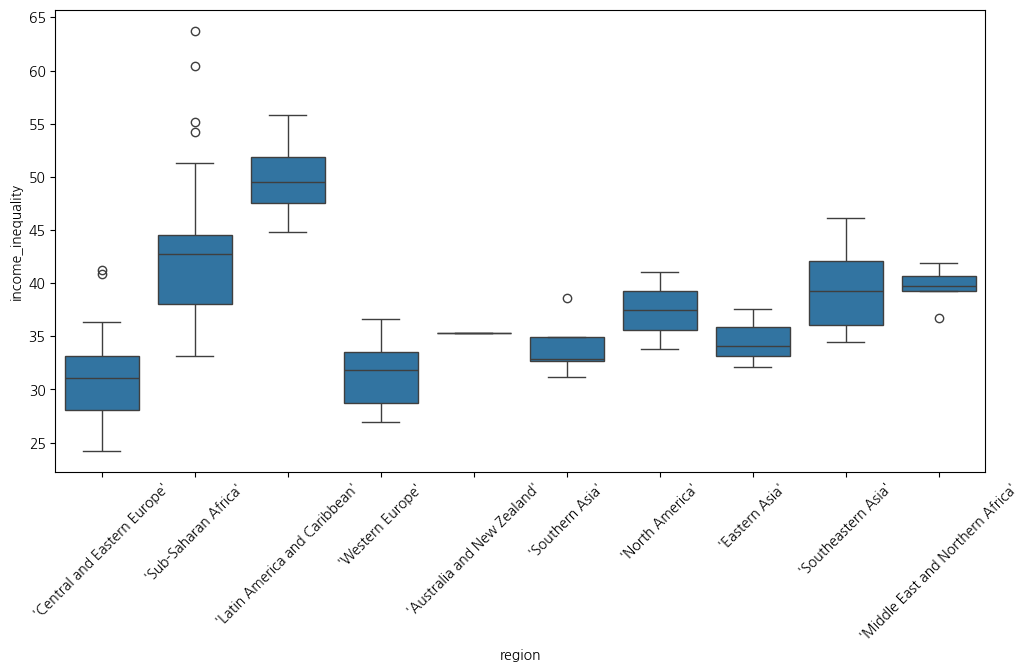

In [18]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data_df,x='region',y='income_inequality', order=data_df['region'].unique())
plt.xticks(rotation=45) 
plt.show()

4. 가상 결론 도출
4.1. 행복도에 영향을 미치는 주요 요인
행복 점수에 가장 큰 영향을 미치는 변수는 무엇이라고 가정할 수 있습니까?
분석 결과를 바탕으로 가상 결론을 작성하세요.

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [20]:
data_df[['adjusted_satisfaction','avg_satisfaction','avg_income','income_inequality', 'happyScore', 'GDP']].corr()


,adjusted_satisfaction,avg_satisfaction,avg_income,income_inequality,happyScore,GDP
adjusted_satisfaction,1.000000,0.978067,0.728006,-0.123835,0.901213,0.755578
avg_satisfaction,0.978067,1.000000,0.689043,-0.082471,0.885988,0.776679
avg_income,0.728006,0.689043,1.000000,-0.382587,0.782122,0.814024
income_inequality,-0.123835,-0.082471,-0.382587,1.000000,-0.187222,-0.303204
happyScore,0.901213,0.885988,0.782122,-0.187222,1.000000,0.790061
GDP,0.755578,0.776679,0.814024,-0.303204,0.790061,1.000000


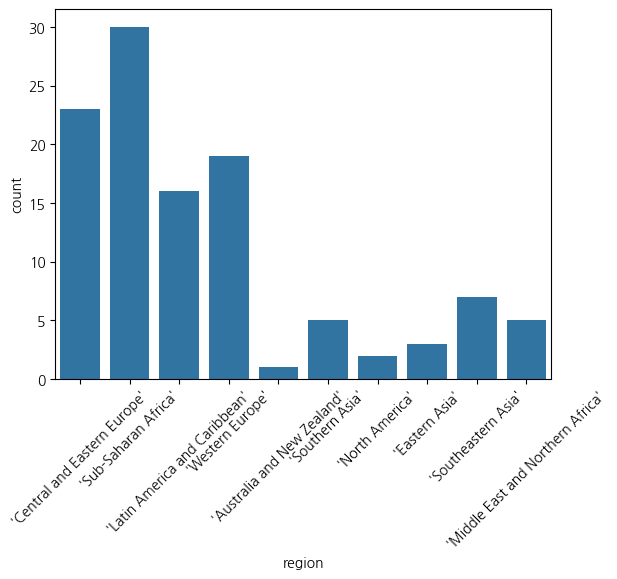

In [23]:
sns.countplot(data=data_df, x='region')
plt.xticks(rotation=45) 
plt.show()

In [25]:
data_df.groupby('region')[['adjusted_satisfaction',
                                        'avg_satisfaction',
                                        'avg_income',
                                        'income_inequality', 
                                        'happyScore', 
                                        'GDP']].corr()

adjusted_satisfaction  \
region                                                                           
'Australia and New Zealand'       adjusted_satisfaction                    NaN   
                                  avg_satisfaction                         NaN   
                                  avg_income                               NaN   
                                  income_inequality                        NaN   
                                  happyScore                               NaN   
                                  GDP                                      NaN   
'Central and Eastern Europe'      adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.945701   
                                  avg_income                          0.520482   
                                  income_inequality                  -0.415991   
                                  happyScore                          0.804002   
                                  GDP                                 0.416397   
'Eastern Asia'                    adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.936766   
                                  avg_income                          0.901960   
                                  income_inequality                  -0.470032   
                                  happyScore                          0.984241   
                                  GDP                                 0.961315   
'Latin America and Caribbean'     adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.964657   
                                  avg_income                          0.318704   
                                  income_inequality                   0.036628   
                                  happyScore                          0.577518   
                                  GDP                                 0.446574   
'Middle East and Northern Africa' adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.988092   
                                  avg_income                          0.982756   
                                  income_inequality                   0.685595   
                                  happyScore                          0.979554   
                                  GDP                                 0.848782   
'North America'                   adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    1.000000   
                                  avg_income                         -1.000000   
                                  income_inequality                  -1.000000   
                                  happyScore                          1.000000   
                                  GDP                                -1.000000   
'Southeastern Asia'               adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.882350   
                                  avg_income                          0.494137   
                                  income_inequality                   0.584024   
                                  happyScore                          0.863272   
                                  GDP                                 0.667736   
'Southern Asia'                   adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.278191   
                                  avg_income                         -0.548524   
                                  income_inequality                  -0.549190   
                                  happyScore                          0.202149   
                                  GDP  

In [ ]:
# 전체 데이터에서 그리고 대부분의 국가 들에서 소득과 행복점수가 양의 상관관계를 보이므로 
# 소득의 증가가 행복의 증가로 이어진다고 볼 수 는 있다 
# 다만, Southern Asia 처럼 음의 상관관계를 갖는 문화권과 
# Sub-Saharan Africa 처럼 낮은 상관관계를 갖는 문화권이 존재하는데,
# 현재 데이터는 특정 문화권의 응답수가 높은 상태이다.
# 그리고 소득 이외에 행복에 영향을 주는 다른 요소가 없는 상태이다.
# 따라서, 더 다양한 문화권의 더 많은 응답 데이터와 더 많은 변수의 데이터가 필요하다고 생각된다.

4.2. 정책 제언
소득 불평등이 높은 지역에 대해 행복도를 개선하기 위한 정책 아이디어를 제안하세요.

In [26]:
data_df.groupby('region')[['adjusted_satisfaction',
                                        'avg_satisfaction',
                                        'income_inequality', 
                                        'happyScore']].corr()

adjusted_satisfaction  \
region                                                                           
'Australia and New Zealand'       adjusted_satisfaction                    NaN   
                                  avg_satisfaction                         NaN   
                                  income_inequality                        NaN   
                                  happyScore                               NaN   
'Central and Eastern Europe'      adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.945701   
                                  income_inequality                  -0.415991   
                                  happyScore                          0.804002   
'Eastern Asia'                    adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.936766   
                                  income_inequality                  -0.470032   
                                  happyScore                          0.984241   
'Latin America and Caribbean'     adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.964657   
                                  income_inequality                   0.036628   
                                  happyScore                          0.577518   
'Middle East and Northern Africa' adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.988092   
                                  income_inequality                   0.685595   
                                  happyScore                          0.979554   
'North America'                   adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    1.000000   
                                  income_inequality                  -1.000000   
                                  happyScore                          1.000000   
'Southeastern Asia'               adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.882350   
                                  income_inequality                   0.584024   
                                  happyScore                          0.863272   
'Southern Asia'                   adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.278191   
                                  income_inequality                  -0.549190   
                                  happyScore                          0.202149   
'Sub-Saharan Africa'              adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.916358   
                                  income_inequality                   0.327652   
                                  happyScore                          0.569705   
'Western Europe'                  adjusted_satisfaction               1.000000   
                                  avg_satisfaction                    0.982181   
                                  income_inequality                  -0.756086   
                                  happyScore                          0.853940   

                                                         avg_satisfaction  \
region                                                                      
'Australia and New Zealand'       adjusted_satisfaction               NaN   
                                  avg_satisfaction                    NaN   
                                  income_inequality                   NaN   
                                  happyScore                          NaN   
'Central and Eastern Europe'      adjusted_satisfaction          0.945701   
                                  avg_satisfaction               1.000000

In [27]:
sorted_regions = data_df.groupby('region')['income_inequality'].mean().sort_values(ascending=False)
print("지역별 소득 불평등 (높은 순):")
print(sorted_regions)

지역별 소득 불평등 (높은 순):
region
'Latin America and Caribbean'        49.823925
'Sub-Saharan Africa'                 43.169778
'Middle East and Northern Africa'    39.686667
'Southeastern Asia'                  39.464667
'North America'                      37.440000
'Australia and New Zealand'          35.285000
'Eastern Asia'                       34.607262
'Southern Asia'                      34.043800
'Western Europe'                     31.314731
'Central and Eastern Europe'         31.227329
Name: income_inequality, dtype: float64


In [ ]:
# Sub-Saharan Africa를 제외하면 행복도가 소득에 대해 양의 상관관계를 가지므로, 소득을 올린다면 
# 행복도가 상승할 가능성이 있다.
